## 一、项目背景介绍
>针对诸多业务场景下的海量债券图表数据处理效率低下的问题，本文基于深度学习技术设计应用于债券图表、图文字光
学符号识别 OCR（Optical Character Recognition）解决方案。本文通过基于PaddleOCR开发套件所设计的债券图表 OCR 的检测和识别方
案，能较好地识别图像中的文字如：身份证、校园卡、银行卡、财务报表等，实现不同实际业务场景中的需求，在一定程度上提高日常应用业务场景的智能化处理能力。

## 涉及工具：
### 1. PaddlePaddle原生框架：
百度出品的深度学习平台飞桨（PaddlePaddle）是主流深度学习框架中一款完全国产化的产品，与Google TensorFlow、Facebook Pytorch齐名。2016 年飞桨正式开源，是国内首个全面开源开放、技术领先、功能完备的产业级深度学习平台。相比国内其他平台，飞桨是一个功能完整的深度学习平台，也是唯一成熟稳定、具备大规模推广条件的深度学习平台。
### 2. PaddleOCR工具库：
PaddleOCR是一个与OCR相关的开源项目，不仅支持超轻量级中文OCR预测模型，总模型仅8.6M（单模型支持中英文数字组合识别、竖排文本识别、长文本识别，其中检测模型DB（4.1M）+识别模型CRNN（4.5M）），而且提供多种文本检测训练算法（EAST、DB）和多种文本识别训练算法（Rosetta、CRNN、STAR-Net、RARE）。
![](https://ai-studio-static-online.cdn.bcebos.com/3cb25eba88674aca819370a36f5ea70d3e15a7f330d34acc96733cf9ab8b5be9)

## 设计方案
![](https://bochuang.web.cloudendpoint.cn/img/lunwen1.png)

## 效果演示：
![](https://bochuang.web.cloudendpoint.cn/img/lunwen2.png)

## 二、数据介绍
>模型训练集为ICDAR2019-LSVT（Large-scale Street View Text with Partial La￾beling）中文街景图像数据集，其中包含 5W（2W 测试 +3W
训练）全标注数据（文本坐标 + 文本内容）使用矩形框标注文本行；测试数据集通过 Python 爬虫随机爬取 + 自行收集的身份证、银行卡和财务报表等数据和随机选取训练集中 20%作为测试数据集。

/home/aistudio/PaddleOCR/train_data/train_img


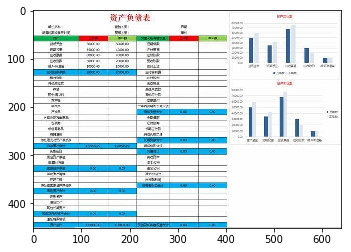

In [2]:
%cd PaddleOCR/train_data/train_img/
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
img = cv2.imread('img_path_615.jpg')
plt.imshow(img[:, :, [2, 1, 0]])

## 三、开发套件介绍
# **PaddleOCR**
## 简介
[PaddleOCR](https://gitee.com/paddlepaddle/PaddleOCR/)旨在打造一套丰富、领先、且实用的OCR工具库，助力使用者训练出更好的模型，并应用落地。
## 特性
- 超轻量级中文OCR模型，总模型仅8.6M
    - 单模型支持中英文数字组合识别、竖排文本识别、长文本识别
    - 检测模型DB（4.1M）+识别模型CRNN（4.5M）
- 实用通用中文OCR模型
- 多种预测推理部署方案，包括服务部署和端侧部署
- 多种文本检测训练算法，EAST、DB、SAST
- 多种文本识别训练算法，Rosetta、CRNN、STAR-Net、RARE、SRN
- 可运行于Linux、Windows、MacOS等多种系统
## 效果展示
![](https://ai-studio-static-online.cdn.bcebos.com/b7f60613e19f4f089b28bc58ad28ba4ef3df01f539ad48898483a3e19303e484)


### PaddleOCR依赖库安装



In [2]:
%cd ~/PaddleOCR
!pip install -r requirements.txt

/home/aistudio/PaddleOCR
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 2.0 MB 14.9 MB/s            
     |████████████████████████████████| 948 kB 5.0 MB/s            
     |████████████████████████████████| 603 kB 77.8 MB/s            
     |████████████████████████████████| 298 kB 10.2 MB/s            
     |████████████████████████████████| 28.2 MB 8.3 MB/s             
     |████████████████████████████████| 13.5 MB 4.3 MB/s            
     |████████████████████████████████| 6.1 MB 6.4 MB/s            
     |████████████████████████████████| 178 kB 6.3 MB/s            
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.1.26
    Uninstalling opencv-python-4.1.1.26:
      Successfully uninstalled opencv-python-4.1.1.26
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


In [27]:
%cd ~/PaddleOCR/
#!pip install -r requirements.txt -i https://mirror.baidu.com/pypi/simple

/home/aistudio/PaddleOCR


In [28]:
!python3 tools/infer_cls.py -c configs/cls/cls_mv3.yml -o Global.checkpoints=./inference/ch_cls/best_accuracy Global.infer_img=doc/imgs_words/en/fgfh.jpg

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
2021-05-11 10:59:13,714 - INFO - {'Global': {'debug': False, 'algorithm': 'CLS', 'use_gpu': False, 'epoch_num': 100, 'log_smooth_window': 20, 'print_batch_step': 100, 'save_model_dir': 'output/cls_mv3', 'save_epoch_step': 3, 'eval_batch_step': 500, 'train_batch_size_per_card': 512, 'test_batch_size_per_card': 512, 'image_shape': [3, 48, 192], 'label_lis

In [ ]:
%cd ~/data

!tar -zxf data8429/train_images.tar.gz

/home/aistudio/data


## 下载预训练模型和解压训练模型

In [ ]:
# 下载预训练模型
%cd ~/PaddleOCR/output/
!wget -P ./rec_CRNN/ https://paddleocr.bj.bcebos.com/20-09-22/server/rec/ch_ppocr_server_v1.1_rec_pre.tar

# 解压预训练模型
%cd rec_CRNN
!tar -xf ch_ppocr_server_v1.1_rec_pre.tar

/home/aistudio/PaddleOCR/output
--2021-02-15 13:04:27--  https://paddleocr.bj.bcebos.com/20-09-22/server/rec/ch_ppocr_server_v1.1_rec_pre.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c00:6c21:10ad:0:ff:b00e:67d
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297577776 (284M) [application/x-tar]
Saving to: ‘./rec_CRNN/ch_ppocr_server_v1.1_rec_pre.tar.1’

ch_ppocr_server_v1. 100%[===================>] 283.79M  30.3MB/s    in 8.5s    

2021-02-15 13:04:35 (33.3 MB/s) - ‘./rec_CRNN/ch_ppocr_server_v1.1_rec_pre.tar.1’ saved [297577776/297577776]

/home/aistudio/PaddleOCR/output/rec_CRNN


# **预处理数据**
* 在模型搭建和训练之前，需要做的第一件事就是对数据进行必要的预处理：
  * 将数据处理成适合于PaddleOCR的格式，即格式为：“" 图像文件名                    json.dumps编码的图像标注信息"”的列表，样例如下：
    ch4_test_images/img_61.jpg    [{"transcription": "MASA", "points": [[310, 104], [416, 141], [418, 216], [312, 179]]}, {...}]
  * 切分训练数据为训练集和验证集，方便模型验证，切分比例为3：2

# **配置文件**
* 和其他Paddle套件一样，PaddleOCR可以通过配置文件方便的对模型的各个参数进行快速的配置
* 自带的配置文件存放在PaddleOCR/configs目录下
* 一般通过修改自带的配置文件就能快速的完成任务的迁移
* 下面就通过本次使用的DB模型的配置文件来介绍一下具体设置：
* 很多详细介绍请参考官方介绍文档，[链接](https://gitee.com/paddlepaddle/PaddleOCR/blob/develop/doc/doc_ch/config.md)
* 下面是我的训练参数设置
```
Global:
  algorithm: DB
  use_gpu: True 
  epoch_num: 1200
  log_smooth_window: 20
  print_batch_step: 2
  save_model_dir: ./output/mytrain_2_14/
  save_epoch_step: 300
  eval_batch_step: [0, 1000]
  train_batch_size_per_card: 16
  test_batch_size_per_card: 8
  image_shape: [3, 640, 640]
  reader_yml: ./configs/det/det_r18_myreader.yml
  pretrain_weights: ./pretrain_models/ResNet18_vd_pretrained/
  save_res_path: ./output/mytrain_2_14/predicts_db.txt
  checkpoints: ./output/mytrain_2_14/best_accuracy
  save_inference_dir:
  infer_img:
  pretrained_model: 
  load_static_weights:

Architecture:
  function: ppocr.modeling.architectures.det_model,DetModel

Backbone:
  function: ppocr.modeling.backbones.det_resnet_vd,ResNet
  layers: 18

Head:
  function: ppocr.modeling.heads.det_db_head,DBHead
  model_name: large
  k: 50
  inner_channels: 256
  out_channels: 2

Loss:
  function: ppocr.modeling.losses.det_db_loss,DBLoss
  balance_loss: true
  main_loss_type: DiceLoss
  alpha: 5
  beta: 10
  ohem_ratio: 3

Optimizer:
  function: ppocr.optimizer,AdamDecay
  base_lr: 0.0001
  beta1: 0.9
  beta2: 0.999
  decay:                                                                                                                         
    function: cosine_decay_warmup
    step_each_epoch: 32                                                                                                         
    total_epoch: 1200

PostProcess:
  function: ppocr.postprocess.db_postprocess,DBPostProcess
  thresh: 0.3
  box_thresh: 0.6
  max_candidates: 1000
  unclip_ratio: 1.5
  
```


# **四、模型介绍**
>在债券图表数据 OCR 检测与文本识别业务系统中，使用基
于分割的 DB（Differentiable Binarization）作为基于分 割网
络 的 文 本 检 测 器 。 首 先 ， 图 片 通 过 特 征 金 字 塔 结 构 的
Resnet50-vd 层（Backbone 特征提取），通过上采样的方式将
特征金字塔的输出变换为同一尺寸，并级联（Cascade）产生
特征及特征层；然后，通过特征层预测概率图（Probability
map）及文本概率图，用于计算该像素属于文本的概率形成
文本概率图，然后根据各像素动态阈值形成动态阈值图；
最后，通过文本概率图和动态阈值图生成 DB二值图，根 据 DB二值图拓展标签生成，形成文本框。
* 模型架构图如下：

![](https://bochuang.web.cloudendpoint.cn/img/lunwen3.png)

# **模型训练**
* 通过下面的命令即可开启训练
* -c 配置文件
* Global.checkpoints 模型检查点文件

In [13]:
%cd ~/PaddleOCR
!python tools/train.py \
    -c configs/det/det_r18_vd_db_v1.1.yml \
    -o Global.checkpoints=./output/mytrain_2_11/best_accuracy

/home/aistudio/PaddleOCR
2021-02-28 23:02:28,001-INFO: {'Global': {'debug': False, 'algorithm': 'DB', 'use_gpu': True, 'epoch_num': 1200, 'log_smooth_window': 20, 'print_batch_step': 2, 'save_model_dir': './output/mytrain_2_14/', 'save_epoch_step': 300, 'eval_batch_step': [0, 1000], 'train_batch_size_per_card': 16, 'test_batch_size_per_card': 8, 'image_shape': [3, 640, 640], 'reader_yml': './configs/det/det_r18_myreader.yml', 'pretrain_weights': './pretrain_models/ResNet18_vd_pretrained/', 'save_res_path': './output/mytrain_2_14/predicts_db.txt', 'checkpoints': './output/mytrain_2_11/best_accuracy', 'save_inference_dir': None, 'infer_img': None, 'pretrained_model': None, 'load_static_weights': None}, 'Architecture': {'function': 'ppocr.modeling.architectures.det_model,DetModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.det_resnet_vd,ResNet', 'layers': 18}, 'Head': {'function': 'ppocr.modeling.heads.det_db_head,DBHead', 'model_name': 'large', 'k': 50, 'inner_channels': 256, '

# **模型评估**
* 通过下面的命令即可进行模型评估
* -c 配置文件
* Global.checkpoints 模型检查点文件

In [ ]:
!python3 tools/eval.py -c configs/det/det_r18_vd_db_v1.1.yml  -o Global.checkpoints="./output/mytrain_2_14/best_accuracy" PostProcess.box_thresh=0.6 PostProcess.unclip_ratio=1.4

2021-02-15 00:07:13,432-INFO: {'Global': {'debug': False, 'algorithm': 'DB', 'use_gpu': True, 'epoch_num': 1200, 'log_smooth_window': 20, 'print_batch_step': 2, 'save_model_dir': './output/mytrain_2_14/', 'save_epoch_step': 300, 'eval_batch_step': [0, 1000], 'train_batch_size_per_card': 16, 'test_batch_size_per_card': 8, 'image_shape': [3, 640, 640], 'reader_yml': './configs/det/det_r18_myreader.yml', 'pretrain_weights': './pretrain_models/ResNet18_vd_pretrained/', 'save_res_path': './output/mytrain_2_14/predicts_db.txt', 'checkpoints': './output/mytrain_2_14/best_accuracy', 'save_inference_dir': None, 'infer_img': None, 'pretrained_model': None, 'load_static_weights': None}, 'Architecture': {'function': 'ppocr.modeling.architectures.det_model,DetModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.det_resnet_vd,ResNet', 'layers': 18}, 'Head': {'function': 'ppocr.modeling.heads.det_db_head,DBHead', 'model_name': 'large', 'k': 50, 'inner_channels': 256, 'out_channels': 2}, 'Loss'

# **模型预测**
* 通过下面的命令即可对测试集图像进行预测
* -c 配置文件
* Global.checkpoints 模型检查点文件
* Global.infer_img 预测图片路径，可以为图像文件或者图像目录
### 可以看到我训练的模型准确度高达92%，效果怎样呢？我们通过模型推理来看看

In [10]:
%cd ~/PaddleOCR/
!python3 tools/myinfer_det.py -c configs/det/det_r18_vd_db_v1.1.yml -o Global.infer_img="./train_data/schoolcard.jpg" Global.pretrained_model="./output/mytrain_2_14/best_accuracy" Global.load_static_weights=false

/home/aistudio/PaddleOCR
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
2022-02-20 15:48:51,335 - INFO - {'Global': {'debug': False, 'algorithm': 'DB', 'use_gpu': False, 'epoch_num': 1200, 'log_smooth_window': 20, 'print_batch_step': 2, 'save_model_dir': './output/mytrain_2_14/', 'save_epoch_step': 300, 'eval_batch_step': [0, 1000], 'train_batch_size_per_card': 16, 'test_batch_size_per_card': 8, 'im

[Errno 2] No such file or directory: 'output/mytrain_2_14/det_results/'
/home/aistudio/PaddleOCR/output/mytrain_2_14/det_results


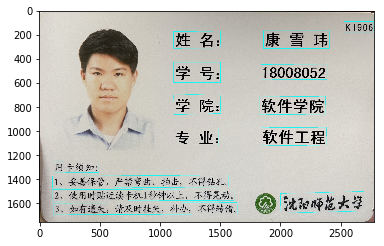

In [14]:
%cd output/mytrain_2_14/det_results/
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
img = cv2.imread('schoolcard.jpg')
plt.imshow(img[:, :, [2, 1, 0]])

# 训练模型转推理模型

In [ ]:
!python3 tools/export_model.py -c configs/det/det_r18_vd_db_v1.1.yml -o Global.pretrained_model=./det_r_18_vd_db/best_accuracy Global.load_static_weights=False Global.save_inference_dir=./inference/det_r18_vd_db

2021-02-09 11:43:24,862-INFO: {'Global': {'debug': False, 'algorithm': 'DB', 'use_gpu': True, 'epoch_num': 50, 'log_smooth_window': 20, 'print_batch_step': 2, 'save_model_dir': './output/det_r_18_vd_db/', 'save_epoch_step': 25, 'eval_batch_step': [3000, 2000], 'train_batch_size_per_card': 16, 'test_batch_size_per_card': 16, 'image_shape': [3, 640, 640], 'reader_yml': './configs/det/det_db_icdar15_reader.yml', 'pretrain_weights': './pretrain_models/ResNet18_vd_pretrained/', 'save_res_path': './output/det_r18_vd_db/predicts_db.txt', 'checkpoints': None, 'save_inference_dir': './inference/det_r18_vd_db', 'infer_img': None, 'pretrained_model': './det_r_18_vd_db/best_accuracy', 'load_static_weights': False}, 'Architecture': {'function': 'ppocr.modeling.architectures.det_model,DetModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.det_resnet_vd,ResNet', 'layers': 18}, 'Head': {'function': 'ppocr.modeling.heads.det_db_head,DBHead', 'model_name': 'large', 'k': 50, 'inner_channels': 256

# 推理模型预测

In [ ]:
!python3 tools/infer/predict_det.py --image_dir="./doc/imgs_en/img_10.jpg" --det_model_dir="./inference/det_r18_vd_db/"

W0209 11:41:20.418347  2572 analysis_predictor.cc:1059] Deprecated. Please use CreatePredictor instead.
2021-02-09 11:41:23,519-INFO: The predicted time of img: ./doc/imgs_en/img_10.jpg is  1.8358261585235596:
2021-02-09 11:41:23,546-INFO: The visualized img saved in ./inference_results/det_res_img_10.jpg


In [ ]:
%cd ~/PaddleOCR
!python tools/export_model.py -c configs/det/det_r18_vd_db_v1.1.yml -o Global.pretrained_model=./output/det_r_18_vd_db/best_accuracy Global.load_static_weights=False Global.save_inference_dir=./inference/det_r18_db/

/home/aistudio/PaddleOCR
Traceback (most recent call last):
  File "tools/export_model.py", line 77, in <module>
    main()
  File "tools/export_model.py", line 49, in main
    startup_prog, eval_program, place, config, _ = program.preprocess()
  File "/home/aistudio/PaddleOCR/tools/program.py", line 655, in preprocess
    merge_config(FLAGS.opt)
  File "/home/aistudio/PaddleOCR/tools/program.py", line 127, in merge_config
    sub_key, cur)
AssertionError: key pretrained_model not in sub_keys: {'debug': False, 'algorithm': 'DB', 'use_gpu': True, 'epoch_num': 50, 'log_smooth_window': 20, 'print_batch_step': 2, 'save_model_dir': './output/det_r_18_vd_db/', 'save_epoch_step': 25, 'eval_batch_step': [3000, 2000], 'train_batch_size_per_card': 16, 'test_batch_size_per_card': 16, 'image_shape': [3, 640, 640], 'reader_yml': './configs/det/det_db_icdar15_reader.yml', 'pretrain_weights': './pretrain_models/ResNet18_vd_pretrained/', 'save_res_path': './output/det_r18_vd_db/predicts_db.txt', 'chec

In [ ]:
!python3 tools/train.py -c configs/det/det_r18_vd_db_v1.1.yml -o Global.checkpoints=./output/det_r_18_vd_db/best_accuracy

2021-02-09 13:40:55,987-INFO: {'Global': {'debug': False, 'algorithm': 'DB', 'use_gpu': True, 'epoch_num': 500, 'log_smooth_window': 20, 'print_batch_step': 2, 'save_model_dir': './output/det_r_18_vd_db/', 'save_epoch_step': 100, 'eval_batch_step': [3000, 2000], 'train_batch_size_per_card': 16, 'test_batch_size_per_card': 16, 'image_shape': [3, 640, 640], 'reader_yml': './configs/det/det_db_icdar15_reader.yml', 'pretrain_weights': './pretrain_models/ResNet18_vd_pretrained/', 'save_res_path': './output/det_r18_vd_db/predicts_db.txt', 'checkpoints': './output/det_r_18_vd_db/best_accuracy', 'save_inference_dir': None, 'infer_img': None, 'pretrained_model': None, 'load_static_weights': None}, 'Architecture': {'function': 'ppocr.modeling.architectures.det_model,DetModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.det_resnet_vd,ResNet', 'layers': 18}, 'Head': {'function': 'ppocr.modeling.heads.det_db_head,DBHead', 'model_name': 'large', 'k': 50, 'inner_channels': 256, 'out_channels

In [ ]:
%cd ~/PaddleOCR
!python3 tools/train.py -c configs/det/det_r50_vd_east.yml \
     -o Global.pretrain_weights=./pretrain_models/ResNet50_vd_ssld_pretrained/

/home/aistudio/PaddleOCR
2021-02-09 00:39:13,428-INFO: {'Global': {'debug': False, 'algorithm': 'EAST', 'use_gpu': True, 'epoch_num': 100000, 'log_smooth_window': 20, 'print_batch_step': 5, 'save_model_dir': './output/det_east/', 'save_epoch_step': 200, 'eval_batch_step': [5000, 5000], 'train_batch_size_per_card': 8, 'test_batch_size_per_card': 16, 'image_shape': [3, 512, 512], 'reader_yml': './configs/det/det_east_icdar15_reader.yml', 'pretrain_weights': './pretrain_models/ResNet50_vd_ssld_pretrained/', 'save_res_path': './output/det_east/predicts_east.txt', 'checkpoints': None, 'save_inference_dir': None, 'infer_img': None}, 'Architecture': {'function': 'ppocr.modeling.architectures.det_model,DetModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.det_resnet_vd,ResNet', 'layers': 50}, 'Head': {'function': 'ppocr.modeling.heads.det_east_head,EASTHead', 'model_name': 'large'}, 'Loss': {'function': 'ppocr.modeling.losses.det_east_loss,EASTLoss'}, 'Optimizer': {'function': 'ppocr.

### 转为推理模型


In [ ]:
!python3 tools/export_model.py -c configs/det/det_r18_vd_db_v1.1.yml -o Global.pretrained_model=./output/mytrain_2_14/best_accuracy Global.load_static_weights=False Global.save_inference_dir=./inference/mytrain_2_14/

2021-02-15 00:25:50,062-INFO: {'Global': {'debug': False, 'algorithm': 'DB', 'use_gpu': True, 'epoch_num': 1200, 'log_smooth_window': 20, 'print_batch_step': 2, 'save_model_dir': './output/mytrain_2_14/', 'save_epoch_step': 300, 'eval_batch_step': [0, 1000], 'train_batch_size_per_card': 16, 'test_batch_size_per_card': 8, 'image_shape': [3, 640, 640], 'reader_yml': './configs/det/det_r18_myreader.yml', 'pretrain_weights': './pretrain_models/ResNet18_vd_pretrained/', 'save_res_path': './output/mytrain_2_14/predicts_db.txt', 'checkpoints': './output/mytrain_2_14/best_accuracy', 'save_inference_dir': './inference/mytrain_2_14/', 'infer_img': None, 'pretrained_model': './output/mytrain_2_14/best_accuracy', 'load_static_weights': False}, 'Architecture': {'function': 'ppocr.modeling.architectures.det_model,DetModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.det_resnet_vd,ResNet', 'layers': 18}, 'Head': {'function': 'ppocr.modeling.heads.det_db_head,DBHead', 'model_name': 'large', '

### 由于将epoch_num改为120后使用单卡GPU训练很费时间，同时训练具有随机性不能保证训练后与我得到同样的结果，所以我将训练120epoch后生成的模型文件打包在data/data50975/文件夹中只需要将 rec_CRNN_aug_341.zip文件解压（数据集地址：https://aistudio.baidu.com/aistudio/datasetdetail/50975），将解压后的文件替换work/PaddleOCR/output/rec_CRNN_aug_341文件夹中的文件即可跳过下面的训练步骤，可以直接进行预测。替换程序如下

In [ ]:
%cd ~
import os
import shutil
!cd data/data50975 && unzip rec_CRNN_aug_341.zip
%cd ~/PaddleOCR/output/rec_CRNN_aug_341
!rm -r *.pdmodel
!rm -r *.pdopt
!rm -r *.pdparams
%cd ~
filelist = os.listdir('data/data50975/rec_CRNN_aug_341')
print(filelist)
for file in filelist:
    src = os.path.join('data/data50975/rec_CRNN_aug_341', file)
    dst = os.path.join('PaddleOCR/output/rec_CRNN_aug_341', file)
    shutil.move(src, dst)
os.chdir('/home/aistudio/PaddleOCR/')
!pwd

/home/aistudio
Archive:  rec_CRNN_aug_341.zip
replace rec_CRNN_aug_341/best_accuracy.pdmodel? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
/home/aistudio/PaddleOCR/output/rec_CRNN_aug_341
rm: cannot remove '*.pdmodel': No such file or directory
rm: cannot remove '*.pdopt': No such file or directory
rm: cannot remove '*.pdparams': No such file or directory
/home/aistudio
['latest.pdmodel', 'best_accuracy.pdopt', 'latest.pdopt', 'best_accuracy.pdmodel', 'latest.pdparams', 'best_accuracy.pdparams']
/home/aistudio/PaddleOCR


# 基于CTC的推理模型转换-训练模型转推理模型

In [ ]:
!python3 tools/export_model.py -c configs/rec/mytrain_rec_ctc.yml -o Global.checkpoints="./output/rec_CRNN_aug_341/best_accuracy" Global.save_inference_dir="./inference/starnet"

2021-02-25 23:12:28,230-INFO: {'Global': {'debug': False, 'algorithm': 'CRNN', 'use_gpu': True, 'epoch_num': 120, 'log_smooth_window': 20, 'print_batch_step': 100, 'save_model_dir': 'output/rec_CRNN_aug_341', 'save_epoch_step': 1, 'eval_batch_step': 1800, 'train_batch_size_per_card': 256, 'test_batch_size_per_card': 128, 'image_shape': [3, 32, 256], 'max_text_length': 64, 'character_type': 'ch', 'loss_type': 'ctc', 'reader_yml': './configs/rec/rec_icdar15_reader.yml', 'pretrain_weights': '/home/aistudio/PaddleOCR/model/latest', 'checkpoints': './output/rec_CRNN_aug_341/best_accuracy', 'save_inference_dir': './inference/starnet', 'character_dict_path': '/home/aistudio/PaddleOCR/dict.txt', 'infer_img': None}, 'Architecture': {'function': 'ppocr.modeling.architectures.rec_model,RecModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.rec_resnet_vd,ResNet', 'layers': 34}, 'Head': {'function': 'ppocr.modeling.heads.rec_ctc_head,CTCPredict', 'encoder_type': 'rnn', 'SeqRNN': {'hidden_si

# CRNN模型推理

In [ ]:
!python3 tools/infer/predict_rec.py --image_dir="./demo/28.jpg" --rec_model_dir="./inference/starnet/"

W0225 23:20:15.717190  1293 analysis_predictor.cc:1059] Deprecated. Please use CreatePredictor instead.
Predicts of ./demo/28.jpg:['疡跷疡又疡讲疡焕疡来疡窿疡青疡', 0.9406951]
Total predict time for 1 images:2.884


In [ ]:
!python3 tools/infer_rec.py -c configs/rec/mytrain_rec_ctc.yml -o Global.pretrained_model=./output/rec_CRNN_aug_341/best_accuracy Global.load_static_weights=false Global.infer_img=demo/28.jpg

2021-02-25 23:29:46,364-INFO: {'Global': {'debug': False, 'algorithm': 'CRNN', 'use_gpu': True, 'epoch_num': 120, 'log_smooth_window': 20, 'print_batch_step': 100, 'save_model_dir': 'output/rec_CRNN_aug_341', 'save_epoch_step': 1, 'eval_batch_step': 1800, 'train_batch_size_per_card': 256, 'test_batch_size_per_card': 128, 'image_shape': [3, 32, 256], 'max_text_length': 64, 'character_type': 'ch', 'loss_type': 'ctc', 'reader_yml': './configs/rec/rec_icdar15_reader.yml', 'pretrain_weights': None, 'checkpoints': None, 'save_inference_dir': '/home/aistudio/test', 'character_dict_path': '/home/aistudio/PaddleOCR/dict.txt', 'infer_img': 'demo/28.jpg', 'pretrained_model': './output/rec_CRNN_aug_341/best_accuracy', 'load_static_weights': False}, 'Architecture': {'function': 'ppocr.modeling.architectures.rec_model,RecModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.rec_resnet_vd,ResNet', 'layers': 34}, 'Head': {'function': 'ppocr.modeling.heads.rec_ctc_head,CTCPredict', 'encoder_type'

In [20]:
%cd ~/PaddleOCR/inference/
!wget https://paddleocr.bj.bcebos.com/20-09-22/server/rec/ch_ppocr_server_v1.1_rec_infer.tar && tar xf ch_ppocr_server_v1.1_rec_infer.tar

/home/aistudio/PaddleOCR/inference
--2021-05-11 09:38:07--  https://paddleocr.bj.bcebos.com/20-09-22/server/rec/ch_ppocr_server_v1.1_rec_infer.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c00:6c21:10ad:0:ff:b00e:67d
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94362069 (90M) [application/x-tar]
Saving to: ‘ch_ppocr_server_v1.1_rec_infer.tar’

ch_ppocr_server_v1. 100%[===================>]  89.99M  14.9MB/s    in 7.2s    

2021-05-11 09:38:14 (12.5 MB/s) - ‘ch_ppocr_server_v1.1_rec_infer.tar’ saved [94362069/94362069]



In [22]:
%cd ~/PaddleOCR/
!python3 tools/infer/predict_system.py --image_dir="./train_data/demo_1/idcard_kang_1.jpg" --det_model_dir="./inference/v1.1_det_infer/"  --rec_model_dir="./inference/v1.1_cls_infer" --cls_model_dir="./inference/v1.1_cls_infer/" --use_angle_cls=True --use_space_char=True

/home/aistudio/PaddleOCR
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
W0511 09:47:50.337512  4373 analysis_predictor.cc:1145] Deprecated. Please use CreatePredictor instead.
dt_boxes num : 17, elapse : 2.6785147190093994
cls num  : 17, elapse : 0.01770186424255371
Traceback (most recent call last):
  File "tools/infer/predict_system.py", line 181, in <module>
    main(utility.parse_args())
  File 

In [26]:
!python3 tools/infer/predict_det.py --image_dir="./train_data/demo_1/idcard_mao1.jpg" --det_model_dir="./inference/v1.1_det_infer/"

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
W0511 10:15:05.829689  7287 analysis_predictor.cc:1145] Deprecated. Please use CreatePredictor instead.
2021-05-11 10:15:10,969 - INFO - The predicted time of img: ./train_data/demo_1/idcard_mao1.jpg is  2.706615924835205:
2021-05-11 10:15:11,016 - INFO - The visualized img saved in ./inference_results/det_res_idcard_mao1.jpg


# **总结**
>随着深度学习技术的不断发展，采用 OCR 技术进行信
息录入的方法已成为信息录入的重要的方法之一。实验结
果表明，本文通过基于深度学习的技术所设计的债券图表
OCR 的检测和识别方案，能较好地识别图像中的文字如：
身份证、校园卡、银行卡、财务报表等，实现不同实际业务
场景中的需求，在一定程度上提高日常应用业务场景的智
能化处理能力。

# **关于作者**
* 康雪玮

* 沈阳师范大学 软件工程专业 大四在读

* 感兴趣的方向为：机器视觉和强化学习等

* AIstudio主页：[Toopking](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/51719)

* 欢迎大家有问题留言交流学习，共同进步成长